In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


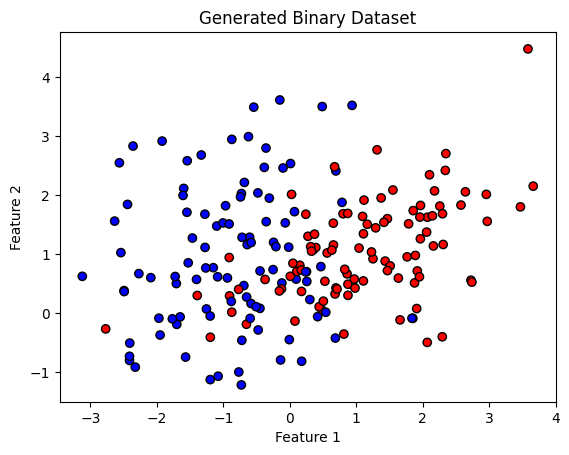

In [2]:
# Generate synthetic binary data
X, y = make_classification(
    n_samples=200,      # total samples
    n_features=2,       # two features for easy visualization
    n_redundant=0,      # no redundant features
    n_informative=2,    # both features are useful
    n_clusters_per_class=1,
    random_state=42
)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Generated Binary Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
# Create a Perceptron model
clf = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

# Train (fit) the model
clf.fit(X_train, y_train)


,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,0.1
,n_jobs,None
,random_state,42


In [5]:
# Predict labels for the test data
y_pred = clf.predict(X_test)


In [6]:
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.2f}")


Model Accuracy: 0.85


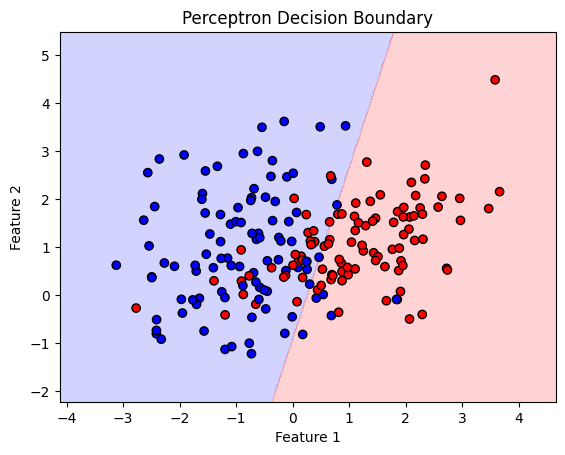

In [7]:
import numpy as np

# Create a mesh grid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each grid point
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Perceptron Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
